# Analysis of bacterial cell oritetation in microchannels
Analyse cell oritentation distribution in microchannels from the experiment [1].

## Purpose
Compare simualtion and experimental cell oritentation data to calibrate simulation parameters.

## Methodology
1. Read experimental data from `data/Ecoli_in_microchannels_EXPER_DATA/*_wid_len_orient_EXP.txt` as a string.
2. Strip string characters and convert the string array into a numerical array.
3. Save `orient` data from files into dictionary.
4. Plot cell oritentation histogram for each file.

### Filename explanation
Example: `4X9_20200609_15_01ch_wid_len_orient_EXP.txt`
- `4X9` ... average number of cells in a channel (height and width)
- `20200609` ... date of recording
- `15` ... ???
- `01ch` ... channel number
- `wid_len_orient` ... calculated variable(s)
- `EXP` ... experimantal

### File structure
Each `wid_len_orient` file contains three lines: width, length and orientation.
``` 
width = [5.60917, 5.787379, 4.9629235, ...]
length = [13.823369, 33.754707, 17.643686, ...]
orient = [75.4713, 102.6692, 94.99006, ...]   
```
Length of each list equals ...(?)

## WIP - improvements
Use this section only if the notebook is not final.

## Notable TODOs:

- Plot oritentation histogram for each simulation step.
- Use `plotly` to visualize multiple steps in one figure.

## Results
A single files that has been analyzed has a normal distribution of angles.

## Suggested next steps
- Compare experimetal and simualtion data plots

# Setup
## Library import

In [2]:
import os
from os.path import join as join_paths, basename as get_basename
import glob

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

In [3]:
os.chdir("/home/i/igors-dubanevics/projects/bacteria-microchannel")
os.getcwd()

'/home/i/igors-dubanevics/projects/bacteria-microchannel'

## Parameter definition

In [4]:
data_dir_path = "data/Ecoli_in_microchannels_EXPER_DATA"

out_dir_path = join_paths("scratch", get_basename(data_dir_path))

## Pre-data import

In [5]:
# Create output dir
os.makedirs(out_dir_path, exist_ok=True)

## Data import

In [6]:
# Store data in a dictionary of form {step_number: cell_state}
orients = {}

# Get data from saved pickle files
# filenames = sorted(glob.glob(join_paths(data_dir_path, '*_wid_len_orient_EXP.txt')))
filenames = sorted(glob.glob(join_paths(data_dir_path, '4X9_20200609_9_01ch_wid_len_orient_EXP.txt')))

for filename in filenames:
    name_vars = get_basename(filename).replace("_wid_len_orient_EXP.txt","").split("_")
    # Extract height and width in cells
    (height, width) = [int(x) for x in name_vars[0].split('X')]
    # Date
    date = name_vars[1]
    # Channel name
    if len(name_vars[2:]) > 1:
        channel_name = '_'.join(name_vars[2:])
    else:
        channel_name = name_vars[2]

    data = np.loadtxt(filename, skiprows=2, dtype=str)

In [9]:
x = ''.join(data)
for string in ["orient=[","]"]:
    x = ''.join(x).replace(string,'')
x = np.fromstring(x, dtype=float, sep=',')
# Align orientation parallely to channel length (shift by -90 deg)
x = x - 90 

## Data processing

In [6]:
lengths = {}
postions = {}
orients = {}

for step_num, cell_state in cell_states.items():
    # Make some convenient data arrays from cell properties
    length = np.array([cell.length for (id,cell) in cell_state.items()]) # [um]
    # Postion in respect to the center of simulation
    # Assume it's center of the channel (0,0)
    pos = np.array([cell.pos for (id,cell) in cell_state.items()])
    # Normalized orientation vector
    orient = np.array([cell.dir for (id,cell) in cell_state.items()])

    lengths[step_num] = length
    postions[step_num] = pos
    orients[step_num] = orient

In [7]:
# Calculate angle in respect to a channel
angles = {}
# Unit-vector parallel to the channel (pointing left-to-right)
x_norm = np.array((1,0,0), dtype=float)
for step_num, orient in orients.items():
    # Dot product with a unit-vector parallel to channel
    inner_prods = np.inner(x_norm,orient)
    # Dot product to radians
    angles[step_num] = np.arccos(inner_prods)

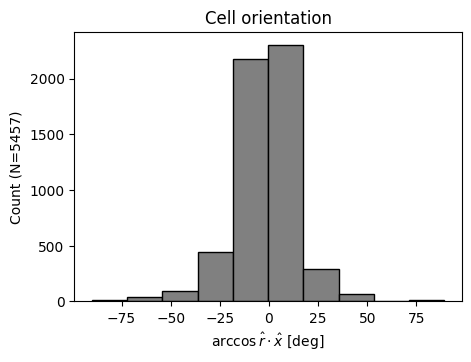

In [10]:
# Plot histograms of some cell properties

# Orientation
plt.figure(figsize=(5,3.5))
plt.title("Cell orientation")
plt.hist(x, edgecolor='black', color='gray')
plt.xlabel(r"$\arccos{\hat{r}\cdot\hat{x}}$ [deg]")
plt.ylabel("Count (N={:d})".format(len(x)))
plt.savefig(join_paths(out_dir_path,'oritent_hist.pdf'), dpi=300)
# plt.close()

In [ ]:
# Plot histograms of some cell properties

# Orientation
plt.figure(figsize=(5,3.5))
plt.title("Cell orientation")
plt.hist(angles[990], edgecolor='black', color='gray')
plt.xlabel(r"$\arccos{\hat{r}\cdot\hat{x}}$ [rad]")
plt.ylabel('Count (N=%d)'%(len(angles[990])))
plt.savefig(join_paths(out_dir_path,'oritent_hist.pdf'), dpi=300)
plt.close()

In [20]:
# Plot histograms of some cell properties
fig = px.histogram(angles[990], 
    title="Cell orientation along x-axis")
fig.update_layout(bargap=0.2,
    xaxis={"title":  "Orientation [rad]"},
    yaxis={"title":  "Count (N=%d)"%(len(angles[990]))})
fig.show()

In [ ]:
# Plot histograms of some cell properties

# Length
plt.figure(figsize=(5,3.5))
plt.title('Cell length')
plt.hist(lengths, edgecolor='black', color='gray')
plt.xlabel('$\mu m$')
plt.ylabel('Count (N=%d)'%(len(cs)))
plt.savefig(join_paths(out_dir_path, 'length_hist.pdf'), dpi=300)

# Distance from origin
plt.figure(figsize=(5,3.5))
plt.title('Distance from origin')
plt.hist(np.sqrt(pos[:,0]**2+pos[:,1]**2), edgecolor='black', color='gray')
plt.xlabel('$\mu m$')
plt.ylabel('Count (N=%d)'%(len(cs)))
plt.savefig(join_paths(out_dir_path, 'pos_hist.pdf'), dpi=300)

## References
1. Koldaeva, Anzhelika, et al. "Population genetics in microchannels." Proceedings of the National Academy of Sciences 119.12 (2022): e2120821119.
2. 